In [2]:
!pip install optuna

In [3]:
import numpy as np
import pandas as pd
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
c_fraud = pd.read_csv("creditcard.csv")

In [5]:
c_fraud.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
#The V1-V28 features are anonymized due to confidentiality and result from a Principal Component Analysis (PCA) transformation
 #making them orthogonal (uncorrelated) and normalized (centered around mean 0 with standard deviation around 1-2). No original features are provided.

In [7]:
c_fraud["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
#this is an inbalance class
c_fraud["Class"].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [9]:
c_fraud.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
#scale amount
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
c_fraud["scaled_amount"] = scaler.fit_transform(c_fraud["Amount"].values.reshape(-1,1))
c_fraud["scaled_time "]= scaler.fit_transform(c_fraud["Time"].values.reshape(-1,1))


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(c_fraud.drop(["Time","Amount","Class"],axis=1),c_fraud["Class"],test_size=0.65,stratify=c_fraud["Class"])

In [12]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [13]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [14]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=42)

X_train_sme, y_train_sme = sme.fit_resample(X_train, y_train)

In [15]:
from imblearn.combine import SMOTETomek


smt = SMOTETomek(random_state=42)


X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)


In [16]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
def evaluate_classification_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba),
        'prauc': average_precision_score(y_test, y_proba),
    }

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    return metrics


In [17]:
import optuna

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
import optuna
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.tree import DecisionTreeClassifier



In [19]:


def create_objective(X_train, y_train):
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 90, 200),
            'max_depth': trial.suggest_int('max_depth', 3, 20),
            'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
            'class_weight': trial.suggest_categorical('class_weight', ['balanced', 'balanced_subsample', None]),
            'random_state': 42
        }

        rf = RandomForestClassifier(**params)
        cv_scores = cross_val_score(
            rf,
            X_train,
            y_train,
            cv=3,
            scoring='average_precision',  
            n_jobs=-1
        )
        return cv_scores.mean()
    return objective


In [20]:
objective_func = create_objective(X_train, y_train)
study = optuna.create_study(direction='maximize')
study.optimize(objective_func, n_trials=50)


[I 2025-09-04 13:35:53,603] A new study created in memory with name: no-name-2b373f54-967f-400d-9b6b-ded5b7fc24b2
[I 2025-09-04 13:36:26,038] Trial 0 finished with value: 0.7480058708459864 and parameters: {'n_estimators': 155, 'max_depth': 3, 'bootstrap': True, 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.7480058708459864.
[I 2025-09-04 13:37:35,160] Trial 1 finished with value: 0.8491523352680778 and parameters: {'n_estimators': 102, 'max_depth': 12, 'bootstrap': True, 'class_weight': None}. Best is trial 1 with value: 0.8491523352680778.
[I 2025-09-04 13:38:46,439] Trial 2 finished with value: 0.8255709017618152 and parameters: {'n_estimators': 189, 'max_depth': 9, 'bootstrap': True, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.8491523352680778.
[I 2025-09-04 13:40:01,574] Trial 3 finished with value: 0.8542679050955262 and parameters: {'n_estimators': 112, 'max_depth': 19, 'bootstrap': False, 'class_weight': 'balanced_subsample'}. Best is trial

In [21]:
print('Best hyperparameters_base:', study.best_params)
print('Best accuracy:', study.best_value)

Best hyperparameters_base: {'n_estimators': 121, 'max_depth': 20, 'bootstrap': False, 'class_weight': 'balanced_subsample'}
Best accuracy: 0.8570524134563199


In [22]:
best_param_base = study.best_params

In [23]:
best_param_base
base_rf = RandomForestClassifier(**best_param_base)
baser_rf=base_rf.fit(X_train,y_train)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    184805
           1       0.92      0.77      0.84       320

    accuracy                           1.00    185125
   macro avg       0.96      0.89      0.92    185125
weighted avg       1.00      1.00      1.00    185125



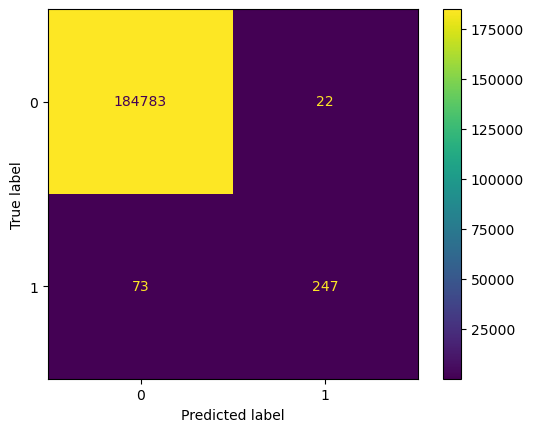

{'accuracy': 0.9994868332207968,
 'precision': 0.9182156133828996,
 'recall': 0.771875,
 'f1_score': 0.8387096774193549,
 'roc_auc': 0.9448181444630828,
 'prauc': 0.8122253194503455}

In [24]:
metrics = evaluate_classification_model(baser_rf,X_test,y_test)
metrics

In [25]:
#for SMOTE

In [27]:
objective_func = create_objective(X_train_smote, y_train_smote)
study_smote = optuna.create_study(direction='maximize')
study_smote.optimize(objective_func, n_trials=20)

[I 2025-09-04 14:54:20,126] A new study created in memory with name: no-name-f932548c-0eb9-481f-b8c3-089ada23c265
[I 2025-09-04 14:56:49,753] Trial 0 finished with value: 0.9999555255357894 and parameters: {'n_estimators': 110, 'max_depth': 11, 'bootstrap': True, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9999555255357894.
[I 2025-09-04 14:59:49,476] Trial 1 finished with value: 0.9999535984222638 and parameters: {'n_estimators': 95, 'max_depth': 12, 'bootstrap': False, 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.9999555255357894.
[I 2025-09-04 15:00:59,385] Trial 2 finished with value: 0.9937121604817042 and parameters: {'n_estimators': 146, 'max_depth': 4, 'bootstrap': True, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9999555255357894.
[I 2025-09-04 15:05:34,297] Trial 3 finished with value: 0.9999653619454375 and parameters: {'n_estimators': 141, 'max_depth': 18, 'bootstrap': False, 'class_weight': None}. Best is trial 3 with v

In [28]:
print('Best hyperparameters_smote:', study_smote.best_params)
print('Best accuracy:', study_smote.best_value)
best_param_smote = study_smote.best_params

Best hyperparameters_smote: {'n_estimators': 178, 'max_depth': 20, 'bootstrap': False, 'class_weight': None}
Best accuracy: 0.9999978305659459


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    184805
           1       0.89      0.78      0.83       320

    accuracy                           1.00    185125
   macro avg       0.94      0.89      0.92    185125
weighted avg       1.00      1.00      1.00    185125



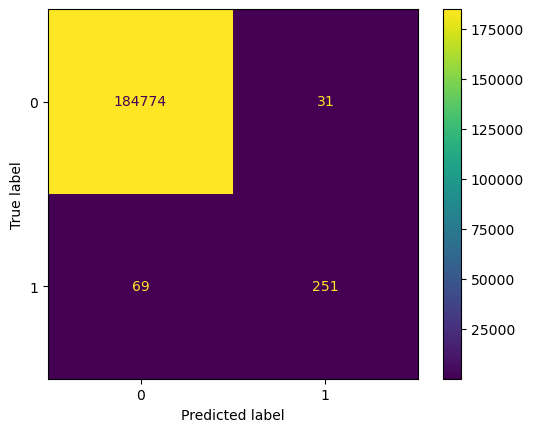

{'accuracy': 0.999459824442944,
 'precision': 0.8900709219858156,
 'recall': 0.784375,
 'f1_score': 0.8338870431893688,
 'roc_auc': 0.9605349134898948,
 'prauc': 0.8064385522380747}

In [29]:
smote_rf = RandomForestClassifier(**best_param_smote)
smote_rf=smote_rf.fit(X_train,y_train)
metrics = evaluate_classification_model(smote_rf,X_test,y_test)
metrics

In [30]:
#for ros

In [31]:
objective_func = create_objective(X_train_ros, y_train_ros)
study_ros = optuna.create_study(direction='maximize')
study_ros.optimize(objective_func, n_trials=20)

[I 2025-09-04 16:57:09,183] A new study created in memory with name: no-name-5fec171f-9094-4500-b29d-8c7d7dfe26fa
[I 2025-09-04 16:58:57,338] Trial 0 finished with value: 0.9931293315538331 and parameters: {'n_estimators': 194, 'max_depth': 3, 'bootstrap': False, 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.9931293315538331.
[I 2025-09-04 17:01:17,654] Trial 1 finished with value: 0.9999932205053503 and parameters: {'n_estimators': 122, 'max_depth': 9, 'bootstrap': False, 'class_weight': None}. Best is trial 1 with value: 0.9999932205053503.
[I 2025-09-04 17:03:14,571] Trial 2 finished with value: 1.0 and parameters: {'n_estimators': 119, 'max_depth': 17, 'bootstrap': True, 'class_weight': 'balanced_subsample'}. Best is trial 2 with value: 1.0.
[I 2025-09-04 17:05:37,049] Trial 3 finished with value: 1.0 and parameters: {'n_estimators': 172, 'max_depth': 19, 'bootstrap': True, 'class_weight': None}. Best is trial 2 with value: 1.0.
[I 2025-09-04 17:07:27,949] Tr

In [32]:
print('Best hyperparameters_smote:', study_ros.best_params)
print('Best accuracy:', study_ros.best_value)
best_param_ros = study_ros.best_params

Best hyperparameters_smote: {'n_estimators': 119, 'max_depth': 17, 'bootstrap': True, 'class_weight': 'balanced_subsample'}
Best accuracy: 1.0


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    184805
           1       0.92      0.74      0.82       320

    accuracy                           1.00    185125
   macro avg       0.96      0.87      0.91    185125
weighted avg       1.00      1.00      1.00    185125



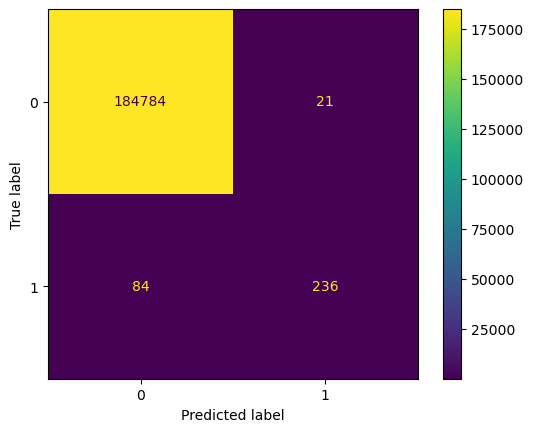

{'accuracy': 0.9994328156650911,
 'precision': 0.9182879377431906,
 'recall': 0.7375,
 'f1_score': 0.8180242634315424,
 'roc_auc': 0.9476991372663077,
 'prauc': 0.807469492207642}

In [33]:
ros_rf = RandomForestClassifier(**best_param_ros)
ros_rf=ros_rf.fit(X_train,y_train)
metrics = evaluate_classification_model(ros_rf,X_test,y_test)
metrics

In [34]:
#for SMOTENN

In [35]:
objective_func = create_objective(X_train_sme, y_train_sme)
study_sme = optuna.create_study(direction='maximize')
study_sme.optimize(objective_func, n_trials=20)
print('Best hyperparameters_sme:', study_sme.best_params)
print('Best accuracy:', study_sme.best_value)
best_param_sme = study_sme.best_params

[I 2025-09-04 17:38:20,021] A new study created in memory with name: no-name-8de1ef34-6483-41a4-8117-b7e4a64f113e
[I 2025-09-04 17:44:54,048] Trial 0 finished with value: 0.9999992796873033 and parameters: {'n_estimators': 197, 'max_depth': 20, 'bootstrap': False, 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.9999992796873033.
[I 2025-09-04 17:47:15,630] Trial 1 finished with value: 0.9999951617099497 and parameters: {'n_estimators': 124, 'max_depth': 12, 'bootstrap': True, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9999992796873033.
[I 2025-09-04 17:50:13,774] Trial 2 finished with value: 0.9999389130824473 and parameters: {'n_estimators': 182, 'max_depth': 9, 'bootstrap': True, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9999992796873033.
[I 2025-09-04 17:54:08,228] Trial 3 finished with value: 0.9999968593727929 and parameters: {'n_estimators': 197, 'max_depth': 14, 'bootstrap': True, 'class_weight': None}. Best is trial 0 with v

Best hyperparameters_sme: {'n_estimators': 169, 'max_depth': 18, 'bootstrap': False, 'class_weight': 'balanced'}
Best accuracy: 0.9999994404417615


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    184805
           1       0.91      0.77      0.84       320

    accuracy                           1.00    185125
   macro avg       0.96      0.88      0.92    185125
weighted avg       1.00      1.00      1.00    185125



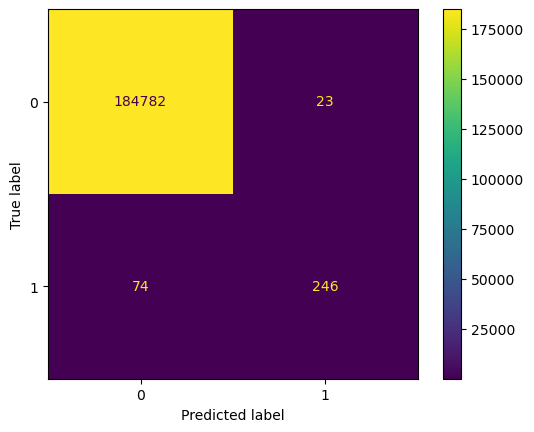

{'accuracy': 0.9994760297096557,
 'precision': 0.9144981412639405,
 'recall': 0.76875,
 'f1_score': 0.8353140916808149,
 'roc_auc': 0.9457355134466059,
 'prauc': 0.8091658601394092}

In [36]:
sme_rf = RandomForestClassifier(**best_param_sme)
sme_rf=sme_rf.fit(X_train,y_train)
metrics = evaluate_classification_model(sme_rf,X_test,y_test)
metrics

In [37]:
#for SMT

In [38]:
objective_func = create_objective(X_train_smt, y_train_smt)
study_smt = optuna.create_study(direction='maximize')
study_smt.optimize(objective_func, n_trials=20)
print('Best hyperparameters_sme:', study_smt.best_params)
print('Best accuracy:', study_smt.best_value)
best_param_smt = study_smt.best_params

[I 2025-09-04 19:07:09,832] A new study created in memory with name: no-name-a92efe19-8a53-4d6e-b9ff-b845dcad7a7b
[I 2025-09-04 19:07:55,527] Trial 0 finished with value: 0.9887227766702656 and parameters: {'n_estimators': 133, 'max_depth': 3, 'bootstrap': True, 'class_weight': None}. Best is trial 0 with value: 0.9887227766702656.
[I 2025-09-04 19:09:44,194] Trial 1 finished with value: 0.9992698832747425 and parameters: {'n_estimators': 128, 'max_depth': 7, 'bootstrap': True, 'class_weight': 'balanced_subsample'}. Best is trial 1 with value: 0.9992698832747425.
[I 2025-09-04 19:13:16,726] Trial 2 finished with value: 0.9999704867748026 and parameters: {'n_estimators': 96, 'max_depth': 17, 'bootstrap': False, 'class_weight': 'balanced_subsample'}. Best is trial 2 with value: 0.9999704867748026.
[I 2025-09-04 19:14:58,565] Trial 3 finished with value: 0.9939134321212432 and parameters: {'n_estimators': 133, 'max_depth': 4, 'bootstrap': False, 'class_weight': 'balanced_subsample'}. Best

Best hyperparameters_sme: {'n_estimators': 183, 'max_depth': 20, 'bootstrap': False, 'class_weight': None}
Best accuracy: 0.9999977951806603


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    184805
           1       0.89      0.78      0.83       320

    accuracy                           1.00    185125
   macro avg       0.95      0.89      0.92    185125
weighted avg       1.00      1.00      1.00    185125



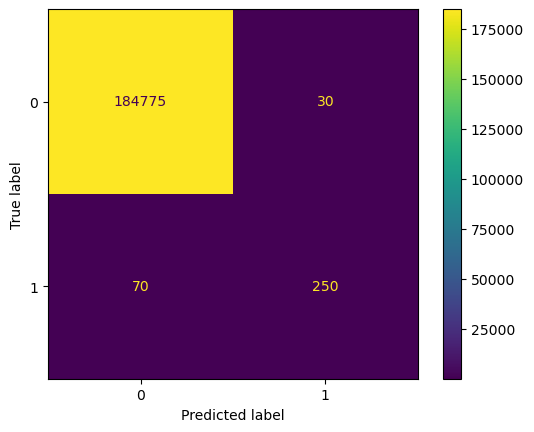

{'accuracy': 0.999459824442944,
 'precision': 0.8928571428571429,
 'recall': 0.78125,
 'f1_score': 0.8333333333333334,
 'roc_auc': 0.9599985880387436,
 'prauc': 0.8093055487704881}

In [39]:
smt_rf = RandomForestClassifier(**best_param_smt)
smt_rf=smt_rf.fit(X_train,y_train)
metrics = evaluate_classification_model(smt_rf,X_test,y_test)
metrics

In [46]:

def create_easy_ensemble_objective(X_train, y_train):
    def objective(trial):
      
        tree_max_depth = trial.suggest_int('tree_max_depth', 3, 10)
        tree_min_samples_split = trial.suggest_int('tree_min_samples_split', 2, 20)

       
        base_estimator = DecisionTreeClassifier(
            max_depth=tree_max_depth,
            min_samples_split=tree_min_samples_split,
            random_state=42
        )

      
        clf = EasyEnsembleClassifier(
            estimator=base_estimator,
            n_estimators=trial.suggest_int('n_estimators', 10, 50),
            random_state=42
        )


        score = cross_val_score(clf, X_train, y_train, scoring='average_precision', cv=3, n_jobs=-1)
        return score.mean()

    return objective


objective = create_easy_ensemble_objective(X_train, y_train)

# Create the Optuna study
study = optuna.create_study(direction='maximize')  
study.optimize(objective, n_trials=20)


print("Best trial:")
trial = study.best_trial
print(f"  Value (average precision): {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


[I 2025-09-04 21:14:05,382] A new study created in memory with name: no-name-6ca596f2-1aa6-42e6-b2ab-bd6abcec8b4a
[I 2025-09-04 21:14:09,060] Trial 0 finished with value: 0.5907305119024993 and parameters: {'tree_max_depth': 6, 'tree_min_samples_split': 20, 'n_estimators': 29}. Best is trial 0 with value: 0.5907305119024993.
[I 2025-09-04 21:14:11,342] Trial 1 finished with value: 0.33527944316840513 and parameters: {'tree_max_depth': 5, 'tree_min_samples_split': 5, 'n_estimators': 10}. Best is trial 0 with value: 0.5907305119024993.
[I 2025-09-04 21:14:14,330] Trial 2 finished with value: 0.5916443379472797 and parameters: {'tree_max_depth': 3, 'tree_min_samples_split': 10, 'n_estimators': 31}. Best is trial 2 with value: 0.5916443379472797.
[I 2025-09-04 21:14:18,723] Trial 3 finished with value: 0.6999723337549323 and parameters: {'tree_max_depth': 5, 'tree_min_samples_split': 11, 'n_estimators': 41}. Best is trial 3 with value: 0.6999723337549323.
[I 2025-09-04 21:14:19,896] Trial 

Best trial:
  Value (average precision): 0.7214702695001346
  Params: 
    tree_max_depth: 10
    tree_min_samples_split: 15
    n_estimators: 50


In [48]:
best_params = trial.params
best_base_estimator = DecisionTreeClassifier(
    max_depth=best_params['tree_max_depth'],
    min_samples_split=best_params['tree_min_samples_split'],
    random_state=42
)
best_model = EasyEnsembleClassifier(
    estimator=best_base_estimator,
    n_estimators=best_params['n_estimators'],
    random_state=42
)
best_model.fit(X_train, y_train)


EasyEnsembleClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                        min_samples_split=15,
                                                        random_state=42),
                       n_estimators=50, random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98    184805
           1       0.03      0.90      0.06       320

    accuracy                           0.95    185125
   macro avg       0.52      0.93      0.52    185125
weighted avg       1.00      0.95      0.98    185125



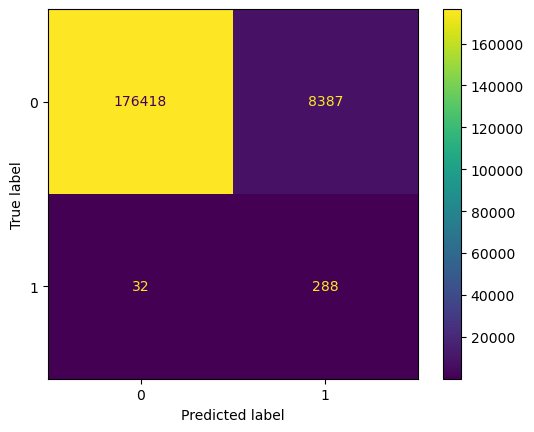

{'accuracy': 0.9545226198514517,
 'precision': 0.03319884726224784,
 'recall': 0.9,
 'f1_score': 0.064035575319622,
 'roc_auc': 0.9706251521874408,
 'prauc': 0.6781968038774975}

In [49]:
evaluate_classification_model(best_model,X_test,y_test)

In [53]:

objective = create_easy_ensemble_objective(X_train_ros, y_train_ros)
study_ros = optuna.create_study(direction='maximize')  


study_ros.optimize(objective, n_trials=10)

print("Best trial of ros:")
trial = study.best_trial
print(f"  Value (average precision): {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")







[I 2025-09-04 21:22:38,606] A new study created in memory with name: no-name-a723ee09-b831-421c-9712-d287c523bd76
[I 2025-09-04 21:26:04,728] Trial 0 finished with value: 0.9841093333086214 and parameters: {'tree_max_depth': 7, 'tree_min_samples_split': 11, 'n_estimators': 48}. Best is trial 0 with value: 0.9841093333086214.
[I 2025-09-04 21:27:17,096] Trial 1 finished with value: 0.9979950248744908 and parameters: {'tree_max_depth': 9, 'tree_min_samples_split': 7, 'n_estimators': 13}. Best is trial 1 with value: 0.9979950248744908.
[I 2025-09-04 21:31:45,726] Trial 2 finished with value: 0.9990269062718727 and parameters: {'tree_max_depth': 10, 'tree_min_samples_split': 13, 'n_estimators': 49}. Best is trial 2 with value: 0.9990269062718727.
[I 2025-09-04 21:35:08,951] Trial 3 finished with value: 0.9940517817280164 and parameters: {'tree_max_depth': 8, 'tree_min_samples_split': 17, 'n_estimators': 42}. Best is trial 2 with value: 0.9990269062718727.
[I 2025-09-04 21:35:47,164] Trial 

Best trial of ros:
  Value (average precision): 0.7214702695001346
  Params: 
    tree_max_depth: 10
    tree_min_samples_split: 15
    n_estimators: 50


In [59]:
best_params = trial.params
best_base_estimator = DecisionTreeClassifier(
    max_depth=best_params['tree_max_depth'],
    min_samples_split=best_params['tree_min_samples_split'],
    random_state=42
)
best_model_ros = EasyEnsembleClassifier(
    estimator=best_base_estimator,
    n_estimators=best_params['n_estimators'],
    random_state=42
)
best_model_ros.fit(X_train_ros, y_train_ros)


EasyEnsembleClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                        min_samples_split=15,
                                                        random_state=42),
                       n_estimators=50, random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    184805
           1       0.06      0.81      0.11       320

    accuracy                           0.98    185125
   macro avg       0.53      0.89      0.55    185125
weighted avg       1.00      0.98      0.99    185125



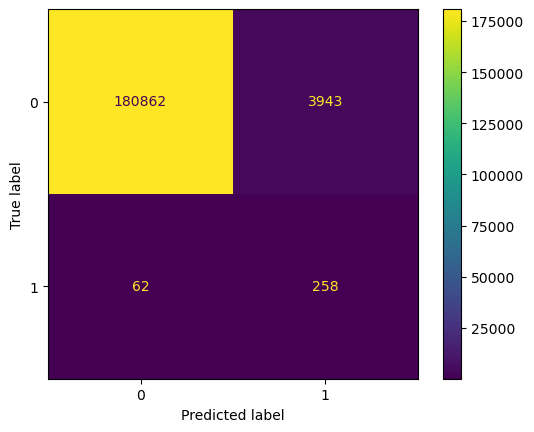

{'accuracy': 0.9783659689399055,
 'precision': 0.06141394905974768,
 'recall': 0.80625,
 'f1_score': 0.11413404114134042,
 'roc_auc': 0.9007440359432916,
 'prauc': 0.6061996188564782}

In [60]:
evaluate_classification_model(best_model_ros,X_test,y_test)

In [ ]:
####

In [62]:

objective = create_easy_ensemble_objective(X_train_smote, y_train_smote)

study_smote = optuna.create_study(direction='maximize')  

study_smote.optimize(objective, n_trials=10)

print("Best trial of smote:")
trial = study.best_trial
print(f"  Value (average precision): {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")






[I 2025-09-04 21:58:55,416] A new study created in memory with name: no-name-c6713bd8-d024-45e5-8e71-0b8c2997bac4
[I 2025-09-04 22:01:48,527] Trial 0 finished with value: 0.9962643708440932 and parameters: {'tree_max_depth': 9, 'tree_min_samples_split': 4, 'n_estimators': 19}. Best is trial 0 with value: 0.9962643708440932.
[I 2025-09-04 22:04:39,795] Trial 1 finished with value: 0.9962584002341611 and parameters: {'tree_max_depth': 9, 'tree_min_samples_split': 16, 'n_estimators': 19}. Best is trial 0 with value: 0.9962643708440932.
[I 2025-09-04 22:12:23,842] Trial 2 finished with value: 0.996923287278585 and parameters: {'tree_max_depth': 10, 'tree_min_samples_split': 14, 'n_estimators': 46}. Best is trial 2 with value: 0.996923287278585.
[I 2025-09-04 22:15:00,098] Trial 3 finished with value: 0.9860034257998923 and parameters: {'tree_max_depth': 6, 'tree_min_samples_split': 17, 'n_estimators': 25}. Best is trial 2 with value: 0.996923287278585.
[I 2025-09-04 22:19:10,930] Trial 4 f

Best trial of smote:
  Value (average precision): 0.7214702695001346
  Params: 
    tree_max_depth: 10
    tree_min_samples_split: 15
    n_estimators: 50


KeyboardInterrupt: 

In [67]:
# Create a base estimator with desired tree parameters
base_tree = DecisionTreeClassifier(min_samples_split=11, random_state=42)

# Create the ensemble classifier
best_model_smote = EasyEnsembleClassifier(
    n_estimators=23,
    estimator=base_tree,
    random_state=42
)

# Fit the model
best_model_smote.fit(X_train_smote, y_train_smote)

EasyEnsembleClassifier(estimator=DecisionTreeClassifier(min_samples_split=11,
                                                        random_state=42),
                       n_estimators=23, random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    184805
           1       0.40      0.74      0.52       320

    accuracy                           1.00    185125
   macro avg       0.70      0.87      0.76    185125
weighted avg       1.00      1.00      1.00    185125



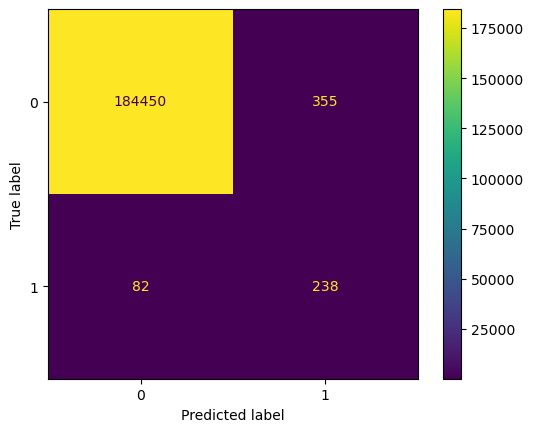

{'accuracy': 0.9976394328156651,
 'precision': 0.40134907251264756,
 'recall': 0.74375,
 'f1_score': 0.5213581599123768,
 'roc_auc': 0.8851012215578583,
 'prauc': 0.4602417109820235}

In [68]:
evaluate_classification_model(best_model_smote,X_test,y_test)

In [69]:
# Example: X_train, y_train are assumed to be predefined, e.g., from a dataset
objective = create_easy_ensemble_objective(X_train_sme, y_train_sme)

# Create the Optuna study
study_sme = optuna.create_study(direction='maximize')  # Maximizing average_precision score

# Optimize the study with 20 trials
study_sme.optimize(objective, n_trials=10)

# Print the best trial details
print("Best trial of smote:")
trial = study.best_trial
print(f"  Value (average precision): {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")




best_params = trial.params
best_base_estimator = DecisionTreeClassifier(
    max_depth=best_params['tree_max_depth'],
    min_samples_split=best_params['tree_min_samples_split'],
    random_state=42
)




[I 2025-09-04 23:03:34,699] A new study created in memory with name: no-name-ee419856-19fb-4c0d-a793-8cc05601feeb
[I 2025-09-04 23:09:36,992] Trial 0 finished with value: 0.9970381469531825 and parameters: {'tree_max_depth': 9, 'tree_min_samples_split': 16, 'n_estimators': 38}. Best is trial 0 with value: 0.9970381469531825.
[I 2025-09-04 23:12:32,321] Trial 1 finished with value: 0.9879840684255368 and parameters: {'tree_max_depth': 6, 'tree_min_samples_split': 12, 'n_estimators': 27}. Best is trial 0 with value: 0.9970381469531825.
[I 2025-09-04 23:17:24,338] Trial 2 finished with value: 0.9879888077729024 and parameters: {'tree_max_depth': 6, 'tree_min_samples_split': 2, 'n_estimators': 45}. Best is trial 0 with value: 0.9970381469531825.
[I 2025-09-04 23:19:47,228] Trial 3 finished with value: 0.9823448113540447 and parameters: {'tree_max_depth': 5, 'tree_min_samples_split': 5, 'n_estimators': 26}. Best is trial 0 with value: 0.9970381469531825.
[I 2025-09-04 23:21:11,434] Trial 4 

Best trial of smote:
  Value (average precision): 0.7214702695001346
  Params: 
    tree_max_depth: 10
    tree_min_samples_split: 15
    n_estimators: 50


TypeError: EasyEnsembleClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [70]:
best_model_sme = EasyEnsembleClassifier(
    estimator=best_base_estimator,
    n_estimators=best_params['n_estimators'],
    random_state=42
)
best_model_sme.fit(X_train_sme, y_train_sme)

EasyEnsembleClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                        min_samples_split=15,
                                                        random_state=42),
                       n_estimators=50, random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    184805
           1       0.14      0.81      0.24       320

    accuracy                           0.99    185125
   macro avg       0.57      0.90      0.62    185125
weighted avg       1.00      0.99      0.99    185125



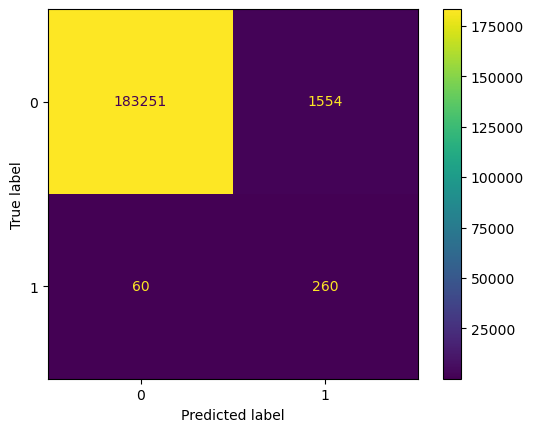

{'accuracy': 0.9912815665091155,
 'precision': 0.14332965821389196,
 'recall': 0.8125,
 'f1_score': 0.2436738519212746,
 'roc_auc': 0.8660891378750577,
 'prauc': 0.4899847718731469}

In [71]:
evaluate_classification_model(best_model_sme,X_test,y_test)

In [72]:

objective = create_easy_ensemble_objective(X_train_smt, y_train_smt)

# Create the Optuna study
study_smt = optuna.create_study(direction='maximize')  

# Optimize the study with 20 trials
study_smt.optimize(objective, n_trials=10)

# Print the best trial details
print("Best trial of smote:")
trial = study.best_trial
print(f"  Value (average precision): {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")




best_params = trial.params
best_base_estimator = DecisionTreeClassifier(
    max_depth=best_params['tree_max_depth'],
    min_samples_split=best_params['tree_min_samples_split'],
    random_state=42
)
best_model_smt = EasyEnsembleClassifier(
    estimator=best_base_estimator,
    n_estimators=best_params['n_estimators'],
    random_state=42
)
best_model_smt.fit(X_train_smt, y_train_smt)



[I 2025-09-05 00:35:48,344] A new study created in memory with name: no-name-43cf7579-5c0e-4be2-ae69-f1978a8e2c94
[W 2025-09-05 00:35:56,724] Trial 0 failed with parameters: {'tree_max_depth': 10, 'tree_min_samples_split': 9, 'n_estimators': 42} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\entro\anaconda3\Lib\site-packages\optuna\study\_optimize.py", line 201, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\entro\AppData\Local\Temp\ipykernel_5492\2314257796.py", line 27, in objective
    score = cross_val_score(clf, X_train, y_train, scoring='average_precision', cv=3, n_jobs=-1)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\entro\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\entro\anaconda

KeyboardInterrupt: 

In [ ]:
evaluate_classification_model(best_model_smt,X_test,y_test)

In [ ]:
#LSTM

In [77]:
X,y =c_fraud.drop(["Time","Amount","Class"],axis=1),c_fraud["Class"]

In [80]:
X_array = X.values
X_reshaped = X_array.reshape((X_array.shape[0], 1, X_array.shape[1]))


In [81]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y, test_size=0.2, random_state=42, stratify=y
)


model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)


y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


C:\Users\entro\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9890 - loss: 0.0722 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 2/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9993 - loss: 0.0028 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 3/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9992 - loss: 0.0033 - val_accuracy: 0.9995 - val_loss: 0.0032
Epoch 4/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9995 - val_loss: 0.0026
Epoch 5/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9993 - loss: 0.0030 - val_accuracy: 0.9993 - val_loss: 0.0027
Epoch 6/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 0.9994 - val_loss: 0.0027
Epoch 7/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9995 - val_loss: 0.0027
Epoch 8/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9995 - loss: 0

In [83]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()
y_pred

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [86]:
from sklearn.metrics import average_precision_score, classification_report, accuracy_score
y_test_pred_probs = model.predict(X_test).flatten()
pr_auc_test = average_precision_score(y_test, y_test_pred_probs)
print(f"Test PR AUC: {pr_auc_test:.4f}")

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Test PR AUC: 0.8532


In [87]:

def create_model(lstm_units, dropout_rate, learning_rate, input_shape):
    model = Sequential()
    model.add(LSTM(units=lstm_units, input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

def objective(trial):
    # Suggest hyperparameters
    lstm_units = trial.suggest_int('lstm_units', 32, 128)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])
    epochs = trial.suggest_int('epochs', 10, 30)

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    pr_aucs = []

    for train_idx, val_idx in skf.split(X_reshaped, y):
        X_train_fold, X_val_fold = X_reshaped[train_idx], X_reshaped[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]

        model = create_model(lstm_units, dropout_rate, learning_rate, input_shape=(X_reshaped.shape[1], X_reshaped.shape[2]))
        
        model.fit(
            X_train_fold, y_train_fold,
            epochs=epochs,
            batch_size=batch_size,
            verbose=0
        )

        y_val_pred_probs = model.predict(X_val_fold).flatten()
        pr_auc = average_precision_score(y_val_fold, y_val_pred_probs)
        pr_aucs.append(pr_auc)

    return np.mean(pr_aucs)


In [92]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print("Best trial:")
trial = study.best_trial
print(f"  PR AUC: {trial.value:.4f}")
print("  Params:")

for key, value in trial.params.items():
    print(f"    {key}: {value}")


[I 2025-09-05 00:58:45,767] A new study created in memory with name: no-name-acabc690-3def-4723-900d-9117d3cc5fab
C:\Users\entro\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2967/2967 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


C:\Users\entro\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2967/2967 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


C:\Users\entro\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2967/2967 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


[I 2025-09-05 01:21:05,306] Trial 0 finished with value: 0.8623988502421697 and parameters: {'lstm_units': 60, 'dropout_rate': 0.41454259192232523, 'learning_rate': 0.00023373221116936192, 'batch_size': 16, 'epochs': 18}. Best is trial 0 with value: 0.8623988502421697.
C:\Users\entro\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2967/2967 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


C:\Users\entro\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2967/2967 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


C:\Users\entro\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2967/2967 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


[I 2025-09-05 01:26:42,988] Trial 1 finished with value: 0.8269706162060513 and parameters: {'lstm_units': 80, 'dropout_rate': 0.142694928425601, 'learning_rate': 0.005026231724714368, 'batch_size': 64, 'epochs': 14}. Best is trial 0 with value: 0.8623988502421697.
C:\Users\entro\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2967/2967 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


C:\Users\entro\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2967/2967 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


C:\Users\entro\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2967/2967 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


[I 2025-09-05 01:31:14,344] Trial 2 finished with value: 0.8250171862013725 and parameters: {'lstm_units': 89, 'dropout_rate': 0.33449171626714647, 'learning_rate': 0.008591185989755737, 'batch_size': 64, 'epochs': 11}. Best is trial 0 with value: 0.8623988502421697.
C:\Users\entro\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2967/2967 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


C:\Users\entro\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2967/2967 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


C:\Users\entro\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2967/2967 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


[I 2025-09-05 01:44:19,542] Trial 3 finished with value: 0.8580516115738721 and parameters: {'lstm_units': 32, 'dropout_rate': 0.41670806141348105, 'learning_rate': 0.0005966232725797139, 'batch_size': 32, 'epochs': 20}. Best is trial 0 with value: 0.8623988502421697.
C:\Users\entro\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2967/2967 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


C:\Users\entro\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2967/2967 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


C:\Users\entro\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2967/2967 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


[I 2025-09-05 02:07:06,269] Trial 4 finished with value: 0.8160866894449827 and parameters: {'lstm_units': 91, 'dropout_rate': 0.15647066984873526, 'learning_rate': 0.007001532175740987, 'batch_size': 16, 'epochs': 17}. Best is trial 0 with value: 0.8623988502421697.
C:\Users\entro\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[W 2025-09-05 02:07:55,203] Trial 5 failed with parameters: {'lstm_units': 104, 'dropout_rate': 0.3915062938211642, 'learning_rate': 0.001841384288934124, 'batch_size': 16, 'epochs': 17} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\entro\anaconda3\Lib\site-packages\optuna\study\_optimize.py", line 201, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^

KeyboardInterrupt: 

In [95]:
final_model = create_model(
    lstm_units=60,
    dropout_rate=0.41454259192232523,
    learning_rate=0.00023373221116936192,
    input_shape=(X_reshaped.shape[1], X_reshaped.shape[2])
)

history = final_model.fit(
    X_reshaped, y,  # your training data and labels
    batch_size=16,
    epochs=18,
    validation_split=0.2,  # or your validation data
    shuffle=False  # typically for time series
)


Epoch 1/18
14241/14241 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.9957 - loss: 0.0677 - val_accuracy: 0.9996 - val_loss: 0.0026
Epoch 2/18
14241/14241 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9991 - loss: 0.0046 - val_accuracy: 0.9996 - val_loss: 0.0023
Epoch 3/18
14241/14241 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9991 - loss: 0.0038 - val_accuracy: 0.9996 - val_loss: 0.0023
Epoch 4/18
14241/14241 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9992 - loss: 0.0036 - val_accuracy: 0.9996 - val_loss: 0.0023
Epoch 5/18
14241/14241 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.9992 - loss: 0.0033 - val_accuracy: 0.9996 - val_loss: 0.0025
Epoch 6/18
14241/14241 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9996 - val_loss: 0.0025
Epoch 7/18
14241/14241 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9996 - val_loss: 0.0025
Epoch 8/18
14241/14241 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 

In [97]:

y_test_pred_probs = final_model.predict(X_test).flatten()

from sklearn.metrics import average_precision_score, classification_report, accuracy_score

pr_auc_test = average_precision_score(y_test, y_test_pred_probs)
print(f"Test PR AUC: {pr_auc_test:.4f}")

# Threshold for classification (0.5)
y_test_pred = (y_test_pred_probs > 0.5).astype(int)

print(classification_report(y_test, y_test_pred))
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Test PR AUC: 0.8989
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.87      0.87        98

    accuracy                           1.00     56962
   macro avg       0.94      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Test Accuracy: 0.9996
